
In this program, we will read comments from csv file and do some text preprocessing and create wordcloud.


In [1]:

import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from urllib.request import urlopen


In [2]:

# read csv
# note that we are using windows-1250 encoding in order to get some Bosnian letters like č,ć,ž,đ,š

data = pd.read_csv("out/comments_klix.csv",delimiter="\t",encoding = "windows-1250")

print(data)

# we need only column comment

comments = data['comment']

                                               comment  vote_up  vote_down
0    Ja ljudi i karaktera. Sve smeće do smeća.Jedin...    444.0       19.0
1                                                  NaN      NaN        NaN
2                                                  NaN      NaN        NaN
3                                      Bake the king ?    248.0      116.0
4                                                   ??     37.0        3.0
5                        Sam protiv svih drugi dio. :)     23.0        7.0
6                    Mjesto im je odavno iza rešetaka!      2.0        0.0
7    ko o cemu, oni o foteljama. Niko o konkretnim ...      5.0        1.0
8    Bake je najnamazaniji među ovom trojicom. Fahr...     22.0        1.0
9    Svakako je doslo vrijeme da se nacionalna manj...      7.0        6.0
10   Ovi politicki klosari Dodik, Covic i Izetbegov...      6.0        1.0
11   Ja godinama na birou i moram se javljati nonst...      8.0        0.0
12              nesto kon


Let's define a function that creates wordcloud. Inside the function, we will do some text cleaning.


In [5]:

def wordcloud_draw(data,img_name,stopwords = None, color = 'black'):
    
    lower_words = []
    
    for row in data:
        
        # if some row isn't string, we will convert it in string
        if type(row)!=str:
            row = str(row)
         
        # lower all words and subtract everything except letters
        lower_words.append(re.sub("[^a-zA-Z_š_ć_ž_č_đ]", " ", row.lower()))
    
    # Some people in comments are using Bosnian characters but some are using character c instead of č,ć etc.
    # We will convert those characters
    lower_words_english = []
    for word in lower_words:
        word = word.replace('č', 'c')
        word = word.replace('ć', 'c')
        word = word.replace('š', 's')
        word = word.replace('ž', 'z')
        word = word.replace('đ', 'd')
        lower_words_english.append(word)
    
    # join all words into one sentence
    words = ' '.join(str(row) for row in lower_words_english)
    
    # remove tabs, multiple spaces 
    cleaned_word = " ".join(word for word in words.split())
    
    #create wordcloud, save and show image
    %matplotlib inline
    wordcloud = WordCloud(stopwords=stopwords,
                        background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.savefig(img_name)
    plt.show()
    

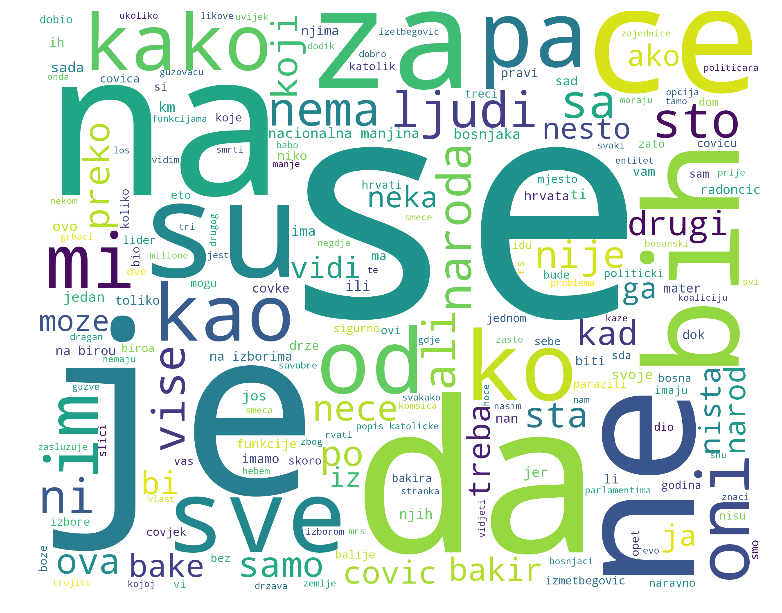

In [6]:
wordcloud_draw(comments,'out/wordcloud.png',color='white')


We can see from the photo that we have a lot of words that don't have a specific meaning. (je, se, da...).

Those words are called stopwords. In wordcloud library, we don't have stopwords for Bosnian language but we can google it and adjust them manually.

I found Croatian stopwords here __[link](https://raw.githubusercontent.com/stopwords-iso/stopwords-hr/master/stopwords-hr.txt)__ and we will use them

In [8]:

hr_stopwords_url = "https://raw.githubusercontent.com/stopwords-iso/stopwords-hr/master/stopwords-hr.txt"
stopwords = urlopen(hr_stopwords_url)
stopwords_list = []

for line in stopwords:
    
    # remove tabs and new lines
    line = re.sub("[^a-zA-Z_š_ć_ž_č_đ]", " ", line.decode("UTF-8"))
    
    # convert some characters
    line = line.replace('č','c')
    line = line.replace('ć','c')
    line = line.replace('š','s')
    line = line.replace('ž','z')
    line = line.replace('đ','d')
    
    # get rid of space char ('a '= 'a') 
    stopwords_list.append(line.split()[0])

print(stopwords_list)

['a', 'ako', 'ali', 'bi', 'bih', 'bila', 'bili', 'bilo', 'bio', 'bismo', 'biste', 'biti', 'bumo', 'da', 'do', 'duz', 'ga', 'hoce', 'hocemo', 'hocete', 'hoces', 'hocu', 'i', 'iako', 'ih', 'ili', 'iz', 'ja', 'je', 'jedna', 'jedne', 'jedno', 'jer', 'jesam', 'jesi', 'jesmo', 'jest', 'jeste', 'jesu', 'jim', 'joj', 'jos', 'ju', 'kada', 'kako', 'kao', 'koja', 'koje', 'koji', 'kojima', 'koju', 'kroz', 'li', 'me', 'mene', 'meni', 'mi', 'mimo', 'moj', 'moja', 'moje', 'mu', 'na', 'nad', 'nakon', 'nam', 'nama', 'nas', 'nas', 'nasa', 'nase', 'naseg', 'ne', 'nego', 'neka', 'neki', 'nekog', 'neku', 'nema', 'netko', 'nece', 'necemo', 'necete', 'neces', 'necu', 'nesto', 'ni', 'nije', 'nikoga', 'nikoje', 'nikoju', 'nisam', 'nisi', 'nismo', 'niste', 'nisu', 'njega', 'njegov', 'njegova', 'njegovo', 'njemu', 'njezin', 'njezina', 'njezino', 'njih', 'njihov', 'njihova', 'njihovo', 'njim', 'njima', 'njoj', 'nju', 'no', 'o', 'od', 'odmah', 'on', 'ona', 'oni', 'ono', 'ova', 'pa', 'pak', 'po', 'pod', 'pored', 'p


Let's see how it looks without stopwords


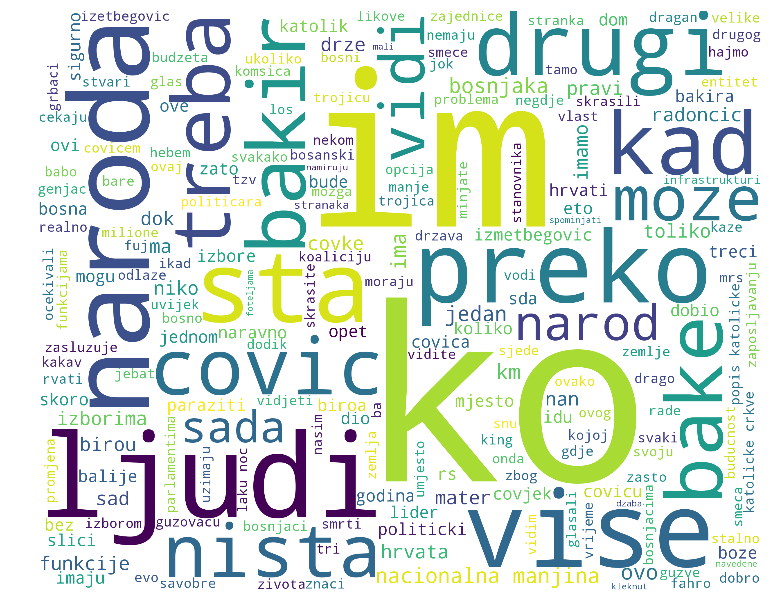

In [9]:

wordcloud_draw(comments,'out_test.png',stopwords_list,'white')
